### 데이터 전처리 
- http://bit.ly/bream_smelt

### 데이터 가공 시 Numpy 사용

In [3]:
# 데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
import numpy as np

In [5]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]

In [6]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [7]:
# numpy로 가공
fish_data = np.column_stack((fish_length, fish_weight))

In [8]:
fish_data.shape

(49, 2)

In [9]:
# numpy로 fish_target
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [10]:
fish_target.shape

(49,)

- 현재 데이터양이 작아서 큰 차이 없음
- 데이터 양이 많아지면 파이썬 리스트보다 Numpy  배열이 훨씬 빠름
- Numpy로 데이터 가공할 것

### 사이킷런 사용 훈련 세트, 테스트 세트 나누기
- Numpy로 랜덤으로 섞은 뒤 파이썬으로 잘랐음

- model_selection.train_test_split() 함수 사용하면 간단하게 나눌 수 있음

In [11]:
from sklearn.model_selection import train_test_split

- random_state : 무작위성을 고정, 재현 가능한 결과를 얻기 위한 값
- 정수 아무거나 입력 가능 : 42(전통 시드값), 20240409(날짜를 입력가능)

In [12]:
# 훈련세트, 테스트세트 분리
# random_state => numpy random 중 random_seed와 동일
# test_size = 0.3 => 7:3으로 나눔

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42, test_size=0.3
)

In [13]:
train_input.shape

(34, 2)

In [14]:
train_target.shape

(34,)

In [15]:
test_input.shape

(15, 2)

In [16]:
# 도미 34 : 빙어 15 => 2.5 : 1 되어야 함
# 빙어 갯수가 조금 모자름
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
# stratify = 입력되는 값을 참조해서 비율을 적당히 조절하는 값
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42, test_size=0.3, stratify=fish_target
)

In [18]:
test_target

array([0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

### 수상한 도미
- 예측이 빗나간 경우

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target) # 훈련
kn.score(test_input, test_target) # 테스트

1.0

In [21]:
# 25cm, 150g 물고기를 예측 
# 여러 데이터를 예측할 것으로 이차원 리스트 형태로 입력 [[]]
kn.predict([[25, 150]])

# 빙어(0)으로 예측

array([0.])

#### 예측실패 파악

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

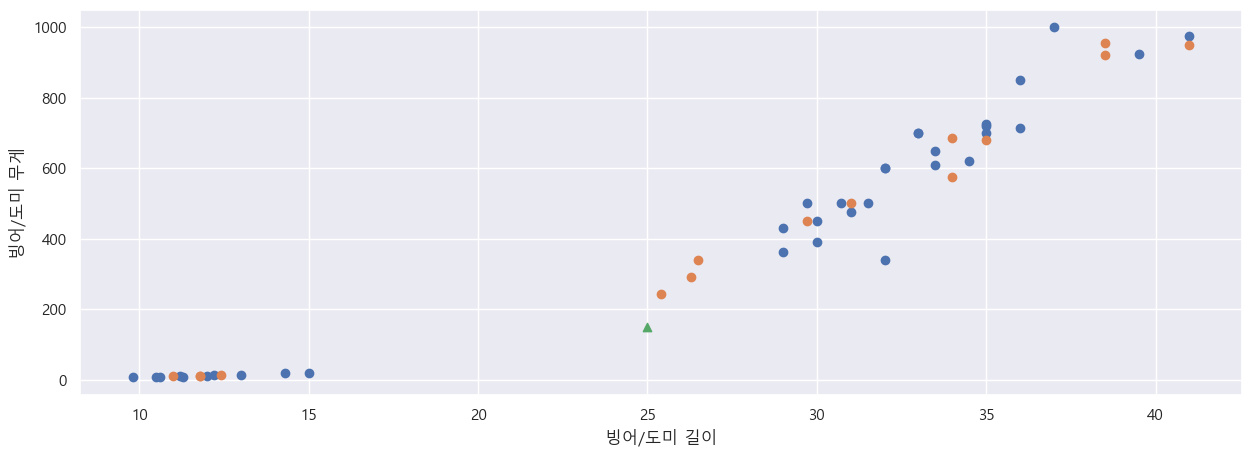

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.xlabel('빙어/도미 길이')
plt.ylabel('빙어/도미 무게')

plt.show()

In [25]:
# 20, 150이 최근접 이웃 찾기
distances, indexes = kn.kneighbors([[25,150]])

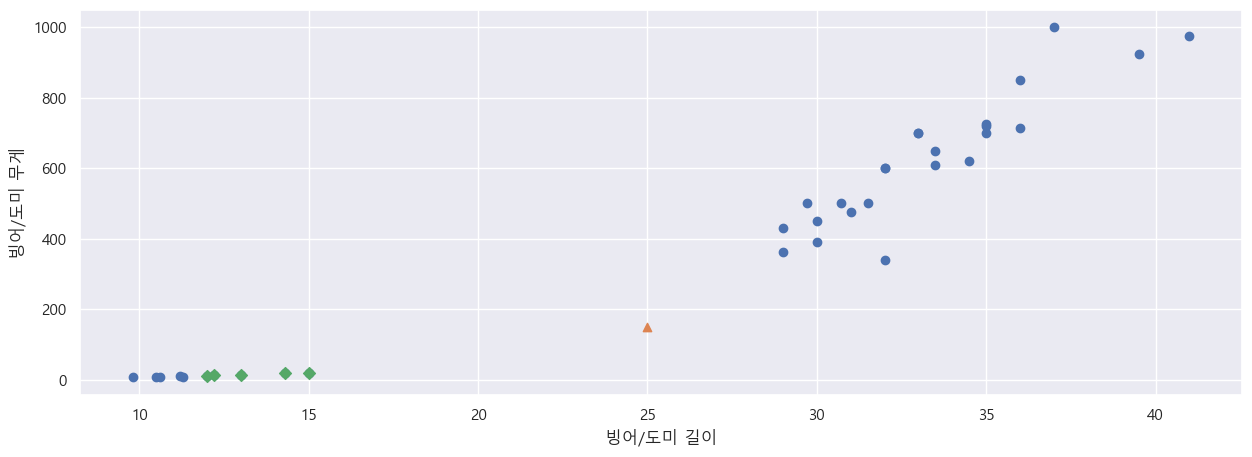

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('빙어/도미 길이')
plt.ylabel('빙어/도미 무게')

plt.show()

In [27]:
# 표준스케일러ㅗ 몯ㅍㄹ 사욧ㅇ
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
train_input2 = scaler.fit_transform(train_input)
test_input2 = scaler.transform(test_input)

In [30]:
test_input2

array([[-1.58938201, -1.36556271],
       [-1.51002961, -1.36493617],
       [ 1.13835694,  1.59579935],
       [ 0.79119016,  0.73430081],
       [ 0.69199966,  0.40536501],
       [-1.4505153 , -1.35397164],
       [-0.07176725, -0.48746075],
       [ 1.38633321,  1.58013574],
       [-0.16103871, -0.6378314 ],
       [ 0.69199966,  0.74996442],
       [ 0.39442813,  0.17041086],
       [ 1.13835694,  1.48615408],
       [ 0.26548048,  0.01377476],
       [-1.51002961, -1.3646229 ],
       [-0.05192915, -0.33082465]])

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr

LinearRegression()

In [33]:
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [34]:
lr.score(test_input, test_target)

0.9026572449043977

In [35]:
lr.predict([[50,]])

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

- 50cm 농어는 1242.9g 무게라고 예측됨

In [ ]:
# 선형회귀 직선 방정식 확인
print(lr.coef_, lr.intercept_)

[ 0.06699754 -0.0007743 ] -0.7595974406480913


- 농어무게 = aX + b
	- a -> 93.01714496
	- b -> -709.018644

In [ ]:
(39.01714496 * 50.0) + (-709.018644)

1241.8386040000003

In [ ]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [ ]:
lr.score(train_input, train_target)

0.9505374866455073

In [ ]:
lr.score(test_input, test_target)

0.9026572449043977

In [ ]:
lr.predict([[10, ]])